[![Labellerr](https://storage.googleapis.com/labellerr-cdn/%200%20Labellerr%20template/notebook.webp)](https://www.labellerr.com)

# **Power Grid Inspection using Computer Vision**

---

[![labellerr](https://img.shields.io/badge/Labellerr-BLOG-black.svg)](https://www.labellerr.com/blog)
[![Youtube](https://img.shields.io/badge/Labellerr-YouTube-b31b1b.svg)](https://www.youtube.com/@Labellerr)
[![Github](https://img.shields.io/badge/Labellerr-GitHub-green.svg)](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)

## Annotate your Custom dataset using Labellerr

 ***1. Visit the [Labellerr](https://www.labellerr.com/?utm_source=githubY&utm_medium=social&utm_campaign=github_clicks) website and click **“Sign Up”**.*** 

 ***2. After signing in, create your workspace by entering a unique name.***

 ***3. Navigate to your workspace’s API keys page (e.g., `https://<your-workspace>.labellerr.com/workspace/api-keys`) to generate your **API Key** and **API Secret**.***

 ***4. Store the credentials securely, and then use them to initialise the SDK or API client with `api_key`, `api_secret`.*** 


### Use Labellerr SDK for uploading and perform annotation of your own dataset

In [ ]:
# uncomment the following lines to install required packages in a Jupyter notebook environment

# !pip install git+https://github.com/Labellerr/SDKPython.git
# !pip install ipyfilechooser
# !git clone https://github.com/Labellerr/yolo_finetune_utils.git

In [ ]:
# all the imports required for this notebook
from labellerr.client import LabellerrClient
from labellerr.core.datasets import create_dataset_from_local
from labellerr.core.annotation_templates import create_template
from labellerr.core.projects import create_project
from labellerr.core.schemas import DatasetConfig, AnnotationQuestion, QuestionType, CreateTemplateParams, DatasetDataType, CreateProjectParams, RotationConfig
from labellerr.core.projects import LabellerrProject
from labellerr.core.exceptions import LabellerrError

import uuid
from ipyfilechooser import FileChooser

In [ ]:
api_key = input("YOUR_API_KEY")        # go to labellerr workspace to get your API key
api_secret = input("YOUR_API_SECRET")  # go to labellerr workspace to get your API secret
client_id = input("YOUR_CLIENT_ID")   # Contact labellerr support to get your client ID i.e. support@tensormatics.com

client = LabellerrClient(api_key, api_secret, client_id)


### ***STEP-1: Create a dataset on labellerr from your local folder***

The SDK supports in creating dataset by uploading local files. 

In [ ]:
# Create a folder chooser starting from a directory (for example, your home directory)
chooser = FileChooser('/')

# Set the chooser to folder selection mode only
chooser.title = 'Select a folder containing your dataset'
chooser.show_only_dirs = True

# Display the widget
display(chooser)

FileChooser(path='D:\', filename='', title='Select a folder containing your dataset', show_hidden=False, selec…

In [ ]:
path_to_dataset = chooser.selected_path
print("You selected:", path_to_dataset)

You selected: D:\Professional\Projects\Cell_Segmentation_using_YOLO\frames_output


In [ ]:
my_dataset_type = input("Enter your dataset type (video or image): ").lower()
print("Selected dataset type:", my_dataset_type)

Selected dataset type: video


In [ ]:
dataset = create_dataset_from_local(
    client=client,
    dataset_config=DatasetConfig(dataset_name="My Dataset", data_type="image"),
    folder_to_upload=path_to_dataset
)

print(f"Dataset created with ID: {dataset.dataset_id}")


### ***STEP-2: Create annotation project on labellerr of your created dataset***

Create a annotation project of your uploaded dataset to start performing annotation on labellerr UI

In [ ]:
# Create annotation guideline template for video annotation project (like classes to be annotated)

template = create_template(
    client=client,
    params=CreateTemplateParams(
        template_name="My Template",
        data_type=DatasetDataType.image,
        questions=[
            AnnotationQuestion(
                question_number=1,
                question="Object",
                question_id=str(uuid.uuid4()),
                question_type=QuestionType.polygon,
                required=True,
                color="#FF0000"
            )
        ]
    )
)
print(f"Annotation template created with ID: {template.annotation_template_id}")


In [ ]:
dataset.status()        # wait until dataset is processed before creating project

project = create_project(
    client=client,
    params=CreateProjectParams(
        project_name="My Project",
        data_type=DatasetDataType.image,
        rotations=RotationConfig(
            annotation_rotation_count=1,
            review_rotation_count=1,
            client_review_rotation_count=1
        )
    ),
    datasets=[dataset],
    annotation_template=template
)

print(f"✓ Project created: {project.project_id}")

Your project has been created now go to labellerr platform to perform annotation 

***click to go to labellerr.com***

[![Labellerr](https://cdn.labellerr.com/1%20%20Documentation/1c9dc7ce-9a54-4111-8fd5-0363ba3e00e1.webp)](https://www.labellerr.com/?utm_source=githubY&utm_medium=social&utm_campaign=github_clicks)
Open the project you created (Projects → select your project).

Click Start Labeling to open the annotation interface. Use the configured labeling tools (bounding boxes, polygon, dot, classification, etc.) to annotate files.
### ***STEP-3: Export your annotation in required format***

Generate a temporary download URL to retrieve your exported JSON file:

### Export Configuration Parameters

| Parameter | Type | Description |
|-----------|------|-------------|
| `export_name` | string | Display name for the export |
| `export_description` | string | Description of what this export contains |
| `export_format` | string | Output format (e.g., `json`, `xml`, `coco`) |
| `statuses` | list | Annotation statuses to include in export |

### Common Annotation Statuses

- **`review`**: Annotations pending review
- **`r_assigned`**: Review assigned to a reviewer
- **`client_review`**: Under client review
- **`cr_assigned`**: Client review assigned
- **`accepted`**: Annotations accepted and finalized

---

In [ ]:
export_config = {
    "export_name": "Weekly Export",
    "export_description": "Export of all accepted annotations",
    "export_format": "coco_json",
    "statuses": ['review', 'r_assigned','client_review', 'cr_assigned','accepted']
}

try:
    # Get project instance
    project = LabellerrProject(client=client, project_id=project.project_id)
    
    # Create export
    result = project.create_local_export(export_config)
    export_id = result["response"]['report_id']
    print(f"Local export created successfully. Export ID: {export_id}")
except LabellerrError as e:
    print(f"Local export creation failed: {str(e)}")
    
    
try:
    download_url = client.fetch_download_url(
        project_id=project.project_id,
        uuid=str(uuid.uuid4()),
        export_id=export_id
    )
    print(f"Download URL: {download_url}")
except LabellerrError as e:
    print(f"Failed to fetch download URL: {str(e)}")


Now you can download your annotations locally using given URL

## Convert COCO Annotations to YOLO Format
Transform the COCO JSON annotation format to YOLO format and organize the dataset for training with proper directory structure.

In [17]:
from yolo_finetune_utils.video_annotation.yolo_converter import convert_to_yolo_segmentation

ANNOTATION_JSON = "annotations.json"
VIDEOS_DIR = "grid_dataset"

convert_to_yolo_segmentation(
    annotation_path=ANNOTATION_JSON,
    videos_dir=VIDEOS_DIR,
    use_split=True,
    split_ratio=(0.4, 0.3, 0.3)
)

Using split ratio: Train=0.4, Val=0.3, Test=0.3
Creating output directory structure in: yolo_seg_dataset
Loading JSON annotation file...
Found classes: ['Insulators', 'Power Transformer']
Aggregating annotations from JSON...


Processing files in JSON: 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]



Extracting frames and saving to YOLO format...
Processing train set (488 frames)...


Exporting train set: 100%|██████████| 488/488 [00:43<00:00, 11.34it/s]


Processing val set (367 frames)...


Exporting val set: 100%|██████████| 367/367 [00:33<00:00, 10.89it/s]


Processing test set (367 frames)...


Exporting test set: 100%|██████████| 367/367 [00:34<00:00, 10.67it/s]



Creating data.yaml file...

Conversion complete! ✨
Dataset saved to: d:\Professional\Projects\Power_Grid_Inspection_using_CV\yolo_seg_dataset
YAML file saved to: d:\Professional\Projects\Power_Grid_Inspection_using_CV\yolo_seg_dataset\data.yaml


## GPU Memory Management
Clear GPU cache and monitor memory allocation to ensure sufficient VRAM for model training.

In [2]:
import torch
torch.cuda.empty_cache()

# Check GPU memory status
print(f"Allocated: {torch.cuda.memory_allocated(0)/1024**3:.2f} GB")
print(f"Cached: {torch.cuda.memory_reserved(0)/1024**3:.2f} GB")
print(f"Free: {torch.cuda.mem_get_info(0)[0]/1024**3:.2f} GB")

Allocated: 0.00 GB
Cached: 0.00 GB
Free: 6.87 GB


## Train YOLO Segmentation Model
Fine-tune the YOLOv11 model on the dataset for 50 epochs with GPU acceleration.

In [3]:
from ultralytics import YOLO

model = YOLO("yolo11s-seg.pt")

In [ ]:
results = model.train(data=r"yolo_seg_dataset\data.yaml", 
                      epochs=100, 
                      imgsz=640,
                      batch=-1,                  # Batch size
                      device=0,                  # GPU device (0 for first GPU, 'cpu' for CPU)
                      workers=4
                      )

## Load Best Trained Model
Set the path to the best model weights from the training run for inference.

In [5]:
MODEL = YOLO(r"runs\segment\train\weights\best.pt")

## Test Inference on Sample Video 1


0: 384x640 4 Power Transformers, 41.7ms
Speed: 18.6ms preprocess, 41.7ms inference, 708.3ms postprocess per image at shape (1, 3, 384, 640)


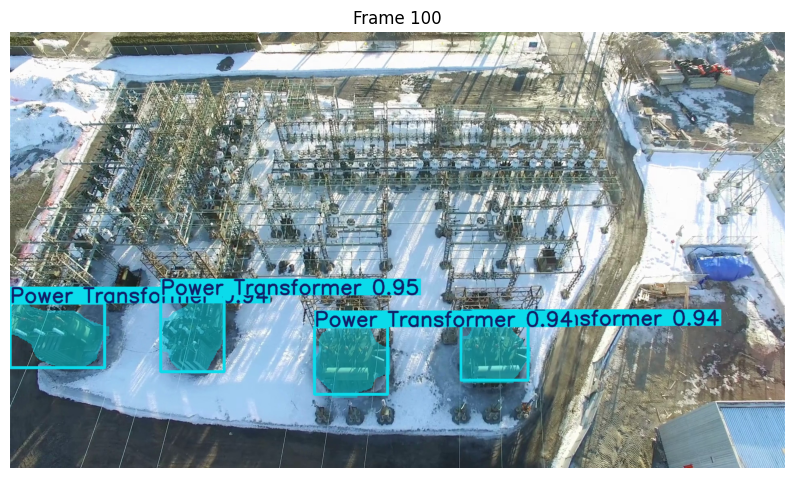

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load the YOLO model
model = MODEL

# Open the video file
video_path = r'grid_dataset\grid_2.mp4'
cap = cv2.VideoCapture(video_path)

# Set the frame position to the 100th frame (0-indexed, so frame 99)
frame_number = 100
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the 100th frame
ret, frame = cap.read()

if ret:
    # Run inference on the frame
    results = model(frame)

    # Plot the results on the frame
    annotated_frame = results[0].plot()

    # Convert BGR to RGB for matplotlib display
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Display the frame using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_frame_rgb)
    plt.axis('off')
    plt.title(f'Frame {frame_number}')
    plt.show()
else:
    print(f"Failed to read frame {frame_number}. Video may have fewer than {frame_number} frames.")

# Release the video capture object
cap.release()

In [7]:
sample_vid = r"grid_dataset\grid_2.mp4"

MODEL.track(sample_vid, conf=0.3, save=True, show_labels=True)


WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/390) d:\Professional\Projects\Power_Grid_Inspection_using_CV\grid_dataset\grid_2.mp4: 384x640 4 Power Transformers, 9.9ms
video 1/1 (frame 2/390) d:\Professional\Projects\Power_Grid_Inspection_using_CV\grid_dataset\grid_2.mp4: 384x640 4 Power Transformers, 9.7ms
video 1/1 (frame 3/390) d:\Professional\Projects\Power_Grid_Inspection_using_CV\grid_dataset\grid_2.mp4: 384x640 4 Power Transformers, 11.6ms
video 1/1 (frame 4/390) d:\Professi

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'Insulators', 1: 'Power Transformer'}
 obb: None
 orig_img: array([[[149, 179, 184],
         [106, 136, 141],
         [ 90, 120, 125],
         ...,
         [108, 137, 139],
         [103, 132, 134],
         [137, 166, 168]],
 
        [[165, 195, 200],
         [116, 146, 151],
         [ 92, 122, 127],
         ...,
         [132, 161, 163],
         [117, 146, 148],
         [147, 176, 178]],
 
        [[123, 153, 158],
         [ 83, 113, 118],
         [ 78, 108, 113],
         ...,
         [145, 174, 176],
         [123, 152, 154],
         [155, 184, 186]],
 
        ...,
 
        [[ 87,  80,  77],
         [ 72,  65,  62],
         [ 66,  59,  56],
         ...,
         [235, 204, 159],
         [226, 195, 150],
         [255, 225, 180]],
 
        [[ 88,  81,  78],
         [ 73,  66,  

## Test Inference on Sample Video 2


0: 384x640 6 Insulatorss, 32.2ms
Speed: 4.9ms preprocess, 32.2ms inference, 19.8ms postprocess per image at shape (1, 3, 384, 640)


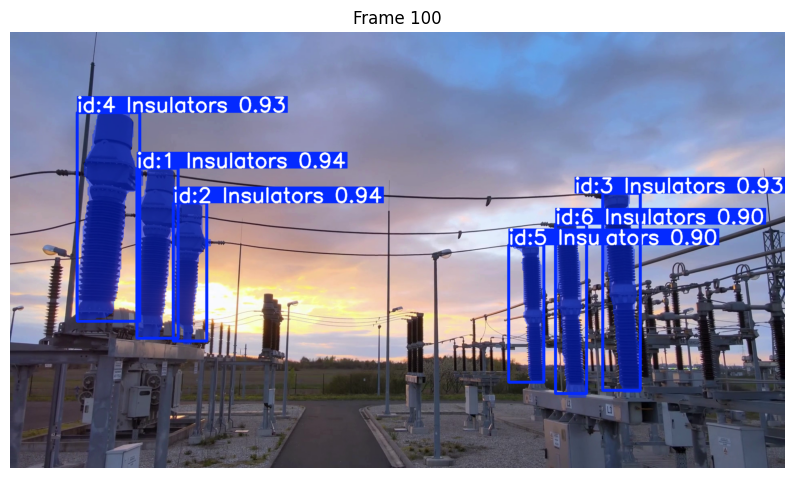

In [8]:
video_path = r'grid_dataset\grid_1.mp4'
cap = cv2.VideoCapture(video_path)

# Set the frame position to the 100th frame (0-indexed, so frame 99)
frame_number = 100
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the 100th frame
ret, frame = cap.read()

if ret:
    # Run inference on the frame
    results = model(frame)

    # Plot the results on the frame
    annotated_frame = results[0].plot()

    # Convert BGR to RGB for matplotlib display
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Display the frame using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_frame_rgb)
    plt.axis('off')
    plt.title(f'Frame {frame_number}')
    plt.show()
else:
    print(f"Failed to read frame {frame_number}. Video may have fewer than {frame_number} frames.")

# Release the video capture object
cap.release()

In [9]:
sample_vid = r"grid_dataset\grid_1.mp4"

MODEL.track(sample_vid, conf=0.3, save=True, show_labels=True)


WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/300) d:\Professional\Projects\Power_Grid_Inspection_using_CV\grid_dataset\grid_1.mp4: 384x640 6 Insulatorss, 27.5ms
video 1/1 (frame 2/300) d:\Professional\Projects\Power_Grid_Inspection_using_CV\grid_dataset\grid_1.mp4: 384x640 6 Insulatorss, 9.9ms
video 1/1 (frame 3/300) d:\Professional\Projects\Power_Grid_Inspection_using_CV\grid_dataset\grid_1.mp4: 384x640 6 Insulatorss, 9.8ms
video 1/1 (frame 4/300) d:\Professional\Projects\Power_G

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'Insulators', 1: 'Power Transformer'}
 obb: None
 orig_img: array([[[190, 138, 110],
         [190, 138, 110],
         [190, 138, 110],
         ...,
         [198, 142, 111],
         [198, 142, 111],
         [198, 142, 111]],
 
        [[190, 138, 110],
         [190, 138, 110],
         [190, 138, 110],
         ...,
         [198, 142, 111],
         [198, 142, 111],
         [198, 142, 111]],
 
        [[190, 138, 110],
         [190, 138, 110],
         [190, 138, 110],
         ...,
         [198, 142, 111],
         [198, 142, 111],
         [198, 142, 111]],
 
        ...,
 
        [[ 52,  35,  38],
         [ 48,  31,  34],
         [ 48,  31,  34],
         ...,
         [107,  85,  73],
         [107,  85,  73],
         [107,  85,  73]],
 
        [[ 51,  34,  37],
         [ 48,  31,  

## Test Inference on Sample Video 3


0: 384x640 10 Insulatorss, 35.6ms
Speed: 2.6ms preprocess, 35.6ms inference, 29.6ms postprocess per image at shape (1, 3, 384, 640)


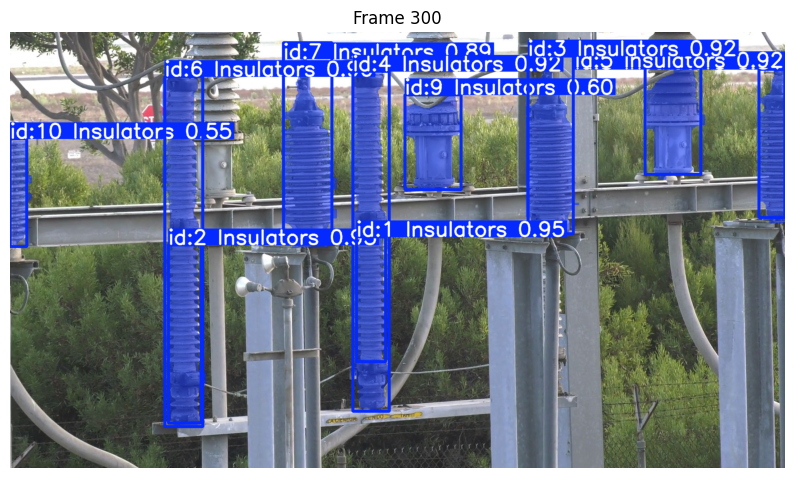

In [10]:
video_path = r'grid_dataset\grid_3.mp4'
cap = cv2.VideoCapture(video_path)

# Set the frame position to the 100th frame (0-indexed, so frame 99)
frame_number = 300
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the 100th frame
ret, frame = cap.read()

if ret:
    # Run inference on the frame
    results = model(frame)

    # Plot the results on the frame
    annotated_frame = results[0].plot()

    # Convert BGR to RGB for matplotlib display
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Display the frame using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_frame_rgb)
    plt.axis('off')
    plt.title(f'Frame {frame_number}')
    plt.show()
else:
    print(f"Failed to read frame {frame_number}. Video may have fewer than {frame_number} frames.")

# Release the video capture object
cap.release()

In [11]:
sample_vid = r"grid_dataset\grid_3.mp4"

MODEL.track(sample_vid, conf=0.3, iou=0.3, save=True, show_labels=True)


WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/540) d:\Professional\Projects\Power_Grid_Inspection_using_CV\grid_dataset\grid_3.mp4: 384x640 9 Insulatorss, 34.2ms
video 1/1 (frame 2/540) d:\Professional\Projects\Power_Grid_Inspection_using_CV\grid_dataset\grid_3.mp4: 384x640 9 Insulatorss, 9.2ms
video 1/1 (frame 3/540) d:\Professional\Projects\Power_Grid_Inspection_using_CV\grid_dataset\grid_3.mp4: 384x640 9 Insulatorss, 9.9ms
video 1/1 (frame 4/540) d:\Professional\Projects\Power_G

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'Insulators', 1: 'Power Transformer'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [146, 162, 162],
         [135, 151, 151],
         [141, 157, 157]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [152, 168, 168],
         [148, 164, 164],
         [177, 193, 193]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [113, 129, 129],
         [111, 127, 127],
         [121, 137, 137]],
 
        ...,
 
        [[ 57,  86,  82],
         [ 86, 115, 111],
         [ 91, 120, 116],
         ...,
         [139, 117, 100],
         [141, 119, 102],
         [141, 119, 102]],
 
        [[ 49,  81,  76],
         [ 82, 114, 1

---

## 👨‍💻 About Labellerr's Hands-On Learning in Computer Vision

Thank you for exploring this **Labellerr Hands-On Computer Vision Cookbook**! We hope this notebook helped you learn, prototype, and accelerate your vision projects.  
Labellerr provides ready-to-run Jupyter/Colab notebooks for the latest models and real-world use cases in computer vision, AI agents, and data annotation.

---
## 🧑‍🔬 Check Our Popular Youtube Videos

Whether you're a beginner or a practitioner, our hands-on training videos are perfect for learning custom model building, computer vision techniques, and applied AI:

- [How to Fine-Tune YOLO on Custom Dataset](https://www.youtube.com/watch?v=pBLWOe01QXU)  
  Step-by-step guide to fine-tuning YOLO for real-world use—environment setup, annotation, training, validation, and inference.
- [Build a Real-Time Intrusion Detection System with YOLO](https://www.youtube.com/watch?v=kwQeokYDVcE)  
  Create an AI-powered system to detect intruders in real time using YOLO and computer vision.
- [Finding Athlete Speed Using YOLO](https://www.youtube.com/watch?v=txW0CQe_pw0)  
  Estimate real-time speed of athletes for sports analytics.
- [Object Counting Using AI](https://www.youtube.com/watch?v=smsjBBQcIUQ)  
  Learn dataset curation, annotation, and training for robust object counting AI applications.
---

## 🎦 Popular Labellerr YouTube Videos

Level up your skills and see video walkthroughs of these tools and notebooks on the  
[Labellerr YouTube Channel](https://www.youtube.com/@Labellerr/videos):

- [How I Fixed My Biggest Annotation Nightmare with Labellerr](https://www.youtube.com/watch?v=hlcFdiuz_HI) – Solving complex annotation for ML engineers.
- [Explore Your Dataset with Labellerr's AI](https://www.youtube.com/watch?v=LdbRXYWVyN0) – Auto-tagging, object counting, image descriptions, and dataset exploration.
- [Boost AI Image Annotation 10X with Labellerr's CLIP Mode](https://www.youtube.com/watch?v=pY_o4EvYMz8) – Refine annotations with precision using CLIP mode.
- [Boost Data Annotation Accuracy and Efficiency with Active Learning](https://www.youtube.com/watch?v=lAYu-ewIhTE) – Speed up your annotation workflow using Active Learning.

> 👉 **Subscribe** for Labellerr's deep learning, annotation, and AI tutorials, or watch videos directly alongside notebooks!

---

## 🤝 Stay Connected

- **Website:** [https://www.labellerr.com/](https://www.labellerr.com/)
- **Blog:** [https://www.labellerr.com/blog/](https://www.labellerr.com/blog/)
- **GitHub:** [Labellerr/Hands-On-Learning-in-Computer-Vision](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)
- **LinkedIn:** [Labellerr](https://in.linkedin.com/company/labellerr)
- **Twitter/X:** [@Labellerr1](https://x.com/Labellerr1)

*Happy learning and building with Labellerr!*
